# ECG classification

Laurent Cetinsoy - Datadidacte


In [1]:
from IPython.display import HTML

## A first naive model by extracting simple features


Your environment contains variables arr, nsr, and chf which respectively contain 10-second recordings of ECG signals extracted from three datasets on PhysioNet: one from a person suffering from arrhythmia, one from a person with a normal heart rhythm, and another from a person with heart failure.


Matplotlib  subplots (or any other library), display these signals on three subfigures (the subplots should be called with the parameter nrows = 3).
Can you find any differences between them?

In [2]:
import numpy as np

arr = np.loadtxt('arr.txt')
chf = np.loadtxt('chf.txt')
nsr = np.loadtxt('nsr.txt')

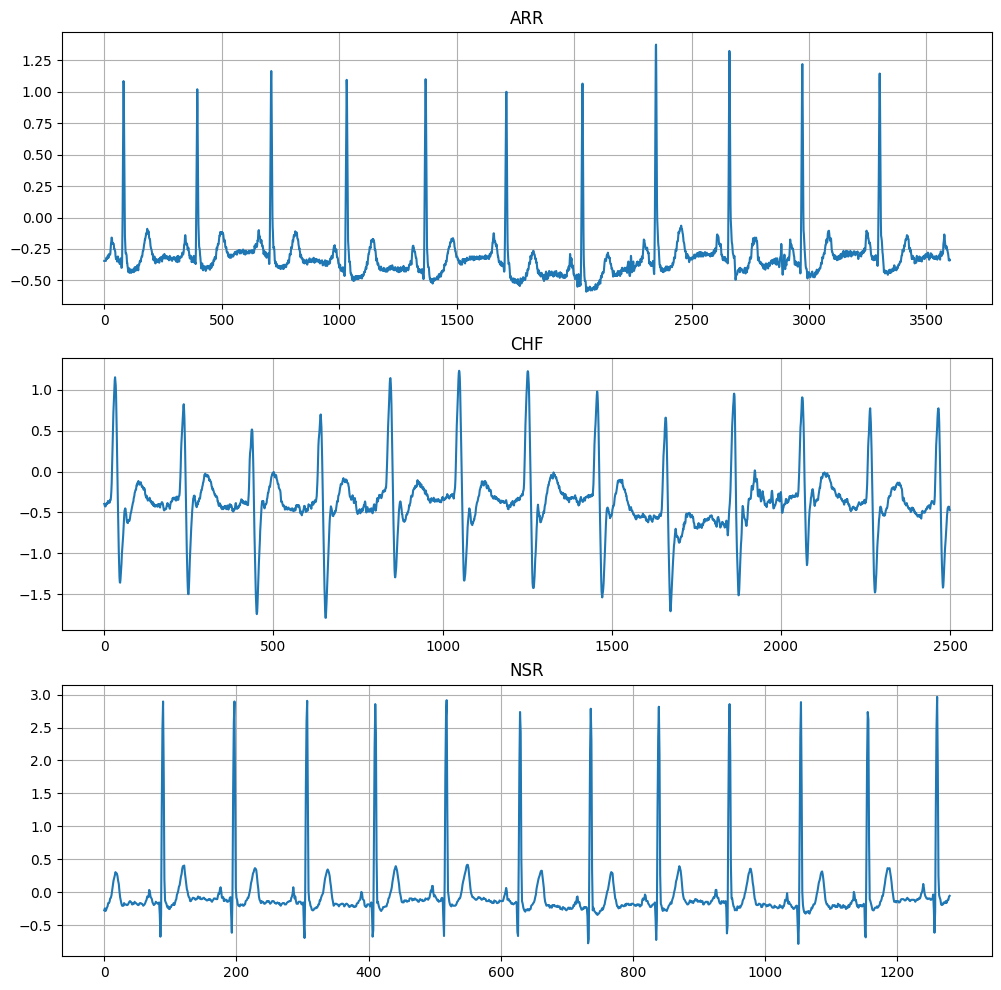

In [3]:
import matplotlib.pyplot as plt

fig, (ax_arr, ax_chf, ax_nsr) = plt.subplots(3, 1, figsize=(12, 12))

ax_arr.plot(arr)
ax_arr.grid(True)
ax_arr.title.set_text('ARR')

ax_chf.plot(chf)
ax_chf.grid(True)
ax_chf.title.set_text('CHF')

ax_nsr.plot(nsr)
ax_nsr.grid(True)
ax_nsr.title.set_text('NSR')

plt.show()

We want to extract features from the time series. For that we will use simple statistics.


Create a function named calculate_stats_features(x) that calculates some statistical features of a signal x using standard numpy functions: nanpercentile, nanmean, etc.
calculate_stats_features will return a list of features in this order:

0. Max
1. Min
2. Mean
3. Median
4. Variance

In [4]:
def calculate_stats_features(x):
    return [np.max(x), np.min(x), np.nanmean(x), np.nanmedian(x), np.nanvar(x)]

In [5]:
print(f"arr: {calculate_stats_features(arr)}")
print(f"chf: {calculate_stats_features(chf)}")
print(f"nsr: {calculate_stats_features(nsr)}")

arr: [1.375, -0.59, -0.3120111111111112, -0.335, 0.039663552654320984]
chf: [1.235, -1.79, -0.363622, -0.375, 0.15541165111599997]
nsr: [2.965, -0.785, -0.035453124999999995, -0.145, 0.21755463842773434]




Create a function named `calculate_zero_crossing(x)` that calculates the Zero
Crossing of a signal x.

The zero crossing is defined as the number of times the signal changes sign.
For this, you can use the signbit, diff, and nonzero functions from numpy.


In [6]:
def calculate_zero_crossing(x):
    sign_changes = np.signbit(x)
    max_len = len(sign_changes)
    count = 0
    
    if max_len <= 1:
        return count
        
    curr = sign_changes[0]
    for i in range(1, max_len):
        if sign_changes[i] != curr:
            count += 1
        curr = sign_changes[i]

    return count

In [7]:
print(f"arr: {calculate_zero_crossing(arr)}")
print(f"chf: {calculate_zero_crossing(chf)}")
print(f"nsr: {calculate_zero_crossing(nsr)}")

arr: 22
chf: 28
nsr: 66


Create a function named **calculate_rms(x)** that returns the Root Mean Square (RMS) of a signal x. We will use the nanmean function instead of the mean function from numpy.

In [8]:
def calculate_rms(x):
    return np.sqrt(np.nanmean(x**2))

In [9]:
print(f"arr: {calculate_rms(arr)}")
print(f"chf: {calculate_rms(chf)}")
print(f"nsr: {calculate_rms(nsr)}")

arr: 0.37015467862923346
chf: 0.5363139099445399
nsr: 0.46777298179779475


Create a function named calculate_entropy(x) that calculates the Shannon entropy of a signal x using the entropy function from scipy.stats.

In [10]:
from scipy.stats import entropy

def calculate_entropy(x):
    _, counts = np.unique(x, return_counts=True)
    probas = counts / counts.sum()
    return entropy(probas, base=2)

In [11]:
print(f"arr: {calculate_entropy(arr)}")
print(f"chf: {calculate_entropy(chf)}")
print(f"nsr: {calculate_entropy(nsr)}")

arr: 6.412131172801207
chf: 7.643477555491811
nsr: 5.7127244365249705


Create a function get_features(x) that combines the features calculated by all previous functions including caculate_stats_features.

In [12]:
def get_features(x):
    res_dict = {
        "calculate_stats_features": 0,
        "calculate_zero_crossing": 0,
        "calculate_rms": 0,
        "calculate_entropy": 0,
    }

    res_dict["calculate_stats_features"] = calculate_stats_features(x)
    res_dict["calculate_zero_crossing"] = calculate_zero_crossing(x)
    res_dict["calculate_rms"] = calculate_rms(x)
    res_dict["calculate_entropy"] = calculate_entropy(x)

    return res_dict

In [13]:
print(f"arr: {get_features(arr)}\n")
print(f"chf: {get_features(chf)}\n")
print(f"nsr: {get_features(nsr)}\n")

arr: {'calculate_stats_features': [1.375, -0.59, -0.3120111111111112, -0.335, 0.039663552654320984], 'calculate_zero_crossing': 22, 'calculate_rms': 0.37015467862923346, 'calculate_entropy': 6.412131172801207}

chf: {'calculate_stats_features': [1.235, -1.79, -0.363622, -0.375, 0.15541165111599997], 'calculate_zero_crossing': 28, 'calculate_rms': 0.5363139099445399, 'calculate_entropy': 7.643477555491811}

nsr: {'calculate_stats_features': [2.965, -0.785, -0.035453124999999995, -0.145, 0.21755463842773434], 'calculate_zero_crossing': 66, 'calculate_rms': 0.46777298179779475, 'calculate_entropy': 5.7127244365249705}



Load the small ecg dataset
Use your fonction get_features create a new dataframe where you have all the feature as X and y as the label.
Train a random forest on it after doing a train test split if the dataset is not too small

In [14]:
import pandas as pd

df = pd.read_csv('ecg_small_dataset.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,15352,15353,15354,15355,15356,15357,15358,15359,15360,15361
0,205,1,-0.429539,-0.431368,-0.427633,-0.453029,-0.460659,-0.448497,-0.469340,-0.475054,...,-0.299412,-0.341126,-0.364847,-0.360565,-0.358913,-0.406275,-0.452011,-0.440424,-0.417412,-0.419938
1,205,1,-0.527040,-0.542357,-0.539678,-0.541406,-0.518841,-0.505650,-0.523337,-0.532713,...,-0.523533,-0.542245,-0.544550,-0.523466,-0.510608,-0.497607,-0.508469,-0.495939,-0.479749,-0.484566
2,chf14,2,-0.410425,-0.416644,-0.424048,-0.398195,-0.393680,-0.386315,-0.371686,-0.377065,...,-0.288222,-0.742357,-1.088831,-1.347331,-1.349561,-1.165759,-1.004126,-0.829844,-0.671777,-0.536377
3,chf14,2,-0.007009,-0.069041,-0.063572,-0.080944,-0.070556,-0.098701,-0.090165,-0.108852,...,-1.906522,-1.694052,-1.534222,-1.338660,-1.167661,-0.989236,-0.777201,-0.544748,-0.313120,-0.032588
4,18184,0,-0.325000,-0.395000,-0.255000,-0.335000,-0.375000,-0.335000,-0.285000,-0.275000,...,-0.085000,-0.105000,-0.135000,-0.135000,-0.155000,-0.155000,-0.135000,-0.145000,-0.125000,-0.115000
5,18184,0,-0.185000,-0.155000,-0.125000,-0.115000,-0.105000,-0.095000,-0.085000,-0.065000,...,-0.105000,-0.135000,-0.145000,-0.145000,-0.155000,-0.165000,-0.165000,-0.145000,-0.155000,-0.135000


In [15]:
labels = df['1'].copy()
labels

0    1
1    1
2    2
3    2
4    0
5    0
Name: 1, dtype: int64

In [16]:
df.drop(['0', '1'], axis=1, inplace=True)
df

,2,3,4,5,6,7,8,9,10,11,...,15352,15353,15354,15355,15356,15357,15358,15359,15360,15361
0,-0.429539,-0.431368,-0.427633,-0.453029,-0.460659,-0.448497,-0.469340,-0.475054,-0.473138,-0.454968,...,-0.299412,-0.341126,-0.364847,-0.360565,-0.358913,-0.406275,-0.452011,-0.440424,-0.417412,-0.419938
1,-0.527040,-0.542357,-0.539678,-0.541406,-0.518841,-0.505650,-0.523337,-0.532713,-0.520244,-0.512301,...,-0.523533,-0.542245,-0.544550,-0.523466,-0.510608,-0.497607,-0.508469,-0.495939,-0.479749,-0.484566
2,-0.410425,-0.416644,-0.424048,-0.398195,-0.393680,-0.386315,-0.371686,-0.377065,-0.368017,-0.358891,...,-0.288222,-0.742357,-1.088831,-1.347331,-1.349561,-1.165759,-1.004126,-0.829844,-0.671777,-0.536377
3,-0.007009,-0.069041,-0.063572,-0.080944,-0.070556,-0.098701,-0.090165,-0.108852,-0.074475,-0.132318,...,-1.906522,-1.694052,-1.534222,-1.338660,-1.167661,-0.989236,-0.777201,-0.544748,-0.313120,-0.032588
4,-0.325000,-0.395000,-0.255000,-0.335000,-0.375000,-0.335000,-0.285000,-0.275000,-0.245000,-0.215000,...,-0.085000,-0.105000,-0.135000,-0.135000,-0.155000,-0.155000,-0.135000,-0.145000,-0.125000,-0.115000
5,-0.185000,-0.155000,-0.125000,-0.115000,-0.105000,-0.095000,-0.085000,-0.065000,-0.025000,-0.005000,...,-0.105000,-0.135000,-0.145000,-0.145000,-0.155000,-0.165000,-0.165000,-0.145000,-0.155000,-0.135000


In [17]:
data = {'max': [], 'min': [], 'mean': [], 'median': [], 'var': [], 'zero_crossing': [], 'rms': [], 'ventropy': []}
df_new = pd.DataFrame(data)
df_new

,max,min,mean,median,var,zero_crossing,rms,ventropy


In [18]:
def transform_df(df):
    data = {'max': [], 'min': [], 'mean': [], 'median': [], 'var': [], 'zero_crossing': [], 'rms': [], 'ventropy': []}
    df_new = pd.DataFrame(data)
    df_new
    
    for index, row in df.iterrows():
        features = get_features(row)
        # print(f"{features}")
        
        curr = {
            'max': [features['calculate_stats_features'][0]],
            'min': [features['calculate_stats_features'][1]],
            'mean': [features['calculate_stats_features'][2]],
            'median': [features['calculate_stats_features'][3]],
            'var': [features['calculate_stats_features'][4]],
            'zero_crossing': [features['calculate_zero_crossing']],
            'rms': [features['calculate_rms']],
            'ventropy': [features['calculate_entropy']]
        }

        df_curr = pd.DataFrame(curr)
        # print(f"df_curr :")
        # display(df_curr)
        
        df_new = pd.concat([df_new, df_curr])
        # print(f"df_new :")
        # display(df_new)

    result =  df_new.copy().reset_index().drop(['index'], axis=1).copy()
    return result

In [19]:
df = transform_df(df)
df

/tmp/ipykernel_23529/4235203819.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curr = sign_changes[0]
/tmp/ipykernel_23529/4235203819.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if sign_changes[i] != curr:
/tmp/ipykernel_23529/4235203819.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curr = sign_changes[i]


,max,min,mean,median,var,zero_crossing,rms,ventropy
0,1.002118,-0.592731,-0.340759,-0.376057,0.032634,358.0,0.385683,13.906891
1,-0.281521,-0.923734,-0.510468,-0.505293,0.003658,0.0,0.514039,13.906891
2,1.235749,-2.492697,-0.344063,-0.354895,0.146738,418.0,0.514895,13.906891
3,1.295494,-3.105455,-0.195126,-0.133382,0.721041,384.0,0.871272,13.906891
4,2.445000,-1.005000,-0.046349,-0.105000,0.133627,1150.0,0.368477,8.998549
5,1.645000,-1.265000,-0.077669,-0.115000,0.064813,812.0,0.266167,8.189352


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.5, random_state=69)

display(X_train)
display(X_test)
display(y_train)
display(y_test)

,max,min,mean,median,var,zero_crossing,rms,ventropy
5,1.645000,-1.265000,-0.077669,-0.115000,0.064813,812.0,0.266167,8.189352
1,-0.281521,-0.923734,-0.510468,-0.505293,0.003658,0.0,0.514039,13.906891
3,1.295494,-3.105455,-0.195126,-0.133382,0.721041,384.0,0.871272,13.906891


,max,min,mean,median,var,zero_crossing,rms,ventropy
0,1.002118,-0.592731,-0.340759,-0.376057,0.032634,358.0,0.385683,13.906891
4,2.445000,-1.005000,-0.046349,-0.105000,0.133627,1150.0,0.368477,8.998549
2,1.235749,-2.492697,-0.344063,-0.354895,0.146738,418.0,0.514895,13.906891


5    0
1    1
3    2
Name: 1, dtype: int64

0    1
4    0
2    2
Name: 1, dtype: int64

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=69)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

In [22]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


Now you have a first pipeline, do the same on the full dataset
Report the train and test loss

In [23]:
from sklearn.metrics import log_loss

y_train_pred = clf.predict_proba(X_train)
y_test_pred = clf.predict_proba(X_test)

train_loss = log_loss(y_train, y_train_pred)
test_loss = log_loss(y_test, y_test_pred)

print(f"Train Log-Loss: {train_loss:.4f}")
print(f"Test Log-Loss: {test_loss:.4f}")

Train Log-Loss: 0.3433
Test Log-Loss: 0.6300


On the full model:

In [24]:
df = pd.read_csv('ECG-laurent.csv')

/tmp/ipykernel_23529/2177432447.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ECG-laurent.csv')


In [25]:
labels = df['1'].copy()

In [26]:
df.drop(['0', '1'], axis=1, inplace=True)

In [27]:
df = transform_df(df)
df

/tmp/ipykernel_23529/4235203819.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curr = sign_changes[0]
/tmp/ipykernel_23529/4235203819.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if sign_changes[i] != curr:
/tmp/ipykernel_23529/4235203819.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curr = sign_changes[i]


,max,min,mean,median,var,zero_crossing,rms,ventropy
0,3.006143,-2.460911,-0.268554,-0.346791,0.420271,4154.0,0.701707,16.0
1,2.527708,-3.550697,-0.221014,-0.106818,0.536639,3768.0,0.765171,16.0
2,2.264555,-3.929179,-0.163022,-0.153941,0.182135,2253.0,0.456849,16.0
3,3.055421,-1.906982,0.053962,0.051409,0.158568,3102.0,0.401846,16.0
4,2.035001,-1.575197,-0.148872,-0.174830,0.111417,4748.0,0.365486,16.0
...,...,...,...,...,...,...,...,...
157,0.635837,-2.036593,-0.217742,-0.113975,0.165278,2068.0,0.461183,16.0
158,2.777683,-1.408466,-0.270539,-0.258593,0.023627,692.0,0.311157,16.0
159,0.919894,-1.070185,-0.172078,-0.164195,0.018569,1762.0,0.219498,16.0
160,7.078177,-5.961910,-0.343730,-0.390100,0.545255,3645.0,0.814497,16.0


In [28]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=69)

In [29]:
clf = RandomForestClassifier(random_state=69)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

In [30]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.85%


In [31]:
y_train_pred = clf.predict_proba(X_train)
y_test_pred = clf.predict_proba(X_test)

train_loss = log_loss(y_train, y_train_pred)
test_loss = log_loss(y_test, y_test_pred)

print(f"Train Log-Loss: {train_loss:.4f}")
print(f"Test Log-Loss: {test_loss:.4f}")

Train Log-Loss: 0.0850
Test Log-Loss: 0.3125


try to tweak the model hyperparameter to see if it works

## Fourier transform features

We want now to see if a model using only fourier transform could work.

create a function get_fourier_coefficients(ecg)

In [32]:
ecg = pd.read_csv('ecg_small_dataset.csv')

labels_ecg = ecg['1'].copy()
labels_ecg

ecg.drop(['0', '1'], axis=1, inplace=True)
ecg

,2,3,4,5,6,7,8,9,10,11,...,15352,15353,15354,15355,15356,15357,15358,15359,15360,15361
0,-0.429539,-0.431368,-0.427633,-0.453029,-0.460659,-0.448497,-0.469340,-0.475054,-0.473138,-0.454968,...,-0.299412,-0.341126,-0.364847,-0.360565,-0.358913,-0.406275,-0.452011,-0.440424,-0.417412,-0.419938
1,-0.527040,-0.542357,-0.539678,-0.541406,-0.518841,-0.505650,-0.523337,-0.532713,-0.520244,-0.512301,...,-0.523533,-0.542245,-0.544550,-0.523466,-0.510608,-0.497607,-0.508469,-0.495939,-0.479749,-0.484566
2,-0.410425,-0.416644,-0.424048,-0.398195,-0.393680,-0.386315,-0.371686,-0.377065,-0.368017,-0.358891,...,-0.288222,-0.742357,-1.088831,-1.347331,-1.349561,-1.165759,-1.004126,-0.829844,-0.671777,-0.536377
3,-0.007009,-0.069041,-0.063572,-0.080944,-0.070556,-0.098701,-0.090165,-0.108852,-0.074475,-0.132318,...,-1.906522,-1.694052,-1.534222,-1.338660,-1.167661,-0.989236,-0.777201,-0.544748,-0.313120,-0.032588
4,-0.325000,-0.395000,-0.255000,-0.335000,-0.375000,-0.335000,-0.285000,-0.275000,-0.245000,-0.215000,...,-0.085000,-0.105000,-0.135000,-0.135000,-0.155000,-0.155000,-0.135000,-0.145000,-0.125000,-0.115000
5,-0.185000,-0.155000,-0.125000,-0.115000,-0.105000,-0.095000,-0.085000,-0.065000,-0.025000,-0.005000,...,-0.105000,-0.135000,-0.145000,-0.145000,-0.155000,-0.165000,-0.165000,-0.145000,-0.155000,-0.135000


In [33]:
def get_fourier_coefficients(ecg):
    fourier_coeffs = np.fft.fft(ecg)
    fourier_mod = np.abs(fourier_coeffs)
    return fourier_mod

Using this function create a dataframe df_fourrier containing the fourrier transform coefficients and the label

In [34]:
def create_df_fourier(ecg, labels_ecg):
    data = []
    
    for index, row in ecg.iterrows():
        ecg_signal = row.values
        fourier_coeffs = get_fourier_coefficients(ecg_signal)
        data.append(np.append(fourier_coeffs, labels_ecg[index]))
    
    df_fourier = pd.DataFrame(data)
    df_fourier.columns = [f'coeff_{i}' for i in range(df_fourier.shape[1]-1)] + ['Label']
    
    return df_fourier.drop(['Label'], axis=1).copy()

In [35]:
df_fourier = create_df_fourier(ecg, labels_ecg)
df_fourier

,coeff_0,coeff_1,coeff_2,coeff_3,coeff_4,coeff_5,coeff_6,coeff_7,coeff_8,coeff_9,...,coeff_15350,coeff_15351,coeff_15352,coeff_15353,coeff_15354,coeff_15355,coeff_15356,coeff_15357,coeff_15358,coeff_15359
0,5234.062222,129.730931,37.060866,201.282706,128.365096,109.518140,19.338217,56.658382,23.278974,21.123506,...,43.370152,21.123506,23.278974,56.658382,19.338217,109.518140,128.365096,201.282706,37.060866,129.730931
1,7840.792889,127.313329,196.318634,139.260063,20.312013,147.240703,15.333304,63.619327,38.102704,19.432705,...,20.811184,19.432705,38.102704,63.619327,15.333304,147.240703,20.312013,139.260063,196.318634,127.313329
2,5284.815360,216.302161,147.992864,57.413992,117.261088,63.328025,136.033012,247.836875,151.304690,340.300002,...,341.224672,340.300002,151.304690,247.836875,136.033012,63.328025,117.261088,57.413992,147.992864,216.302161
3,2997.132800,389.512764,117.639767,261.520268,132.439667,51.412181,50.501987,95.256842,268.112795,131.233369,...,299.489075,131.233369,268.112795,95.256842,50.501987,51.412181,132.439667,261.520268,117.639767,389.512764
4,711.915000,37.344779,74.004836,39.411376,63.504937,60.538140,78.882550,110.709477,107.884507,107.861222,...,277.658070,107.861222,107.884507,110.709477,78.882550,60.538140,63.504937,39.411376,74.004836,37.344779
5,1192.995000,24.612539,16.140040,6.093355,88.149384,91.137574,68.810754,34.703976,32.245674,31.348435,...,74.127679,31.348435,32.245674,34.703976,68.810754,91.137574,88.149384,6.093355,16.140040,24.612539


Try to train a model using the Fourrier coefficient

Try to learn a model using both fourrier coefficient and the features from the previous sections. Does it work ?

In [36]:
def concat_fourier_features(df_features, df_fourier):
    return pd.concat([df_features, df_fourier], axis=1, join="outer").copy()

In [37]:
ecg_features = transform_df(ecg)
ecg_features

/tmp/ipykernel_23529/4235203819.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curr = sign_changes[0]
/tmp/ipykernel_23529/4235203819.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if sign_changes[i] != curr:
/tmp/ipykernel_23529/4235203819.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curr = sign_changes[i]


,max,min,mean,median,var,zero_crossing,rms,ventropy
0,1.002118,-0.592731,-0.340759,-0.376057,0.032634,358.0,0.385683,13.906891
1,-0.281521,-0.923734,-0.510468,-0.505293,0.003658,0.0,0.514039,13.906891
2,1.235749,-2.492697,-0.344063,-0.354895,0.146738,418.0,0.514895,13.906891
3,1.295494,-3.105455,-0.195126,-0.133382,0.721041,384.0,0.871272,13.906891
4,2.445000,-1.005000,-0.046349,-0.105000,0.133627,1150.0,0.368477,8.998549
5,1.645000,-1.265000,-0.077669,-0.115000,0.064813,812.0,0.266167,8.189352


In [38]:
fourier_features = concat_fourier_features(ecg_features, df_fourier)
fourier_features

,max,min,mean,median,var,zero_crossing,rms,ventropy,coeff_0,coeff_1,...,coeff_15350,coeff_15351,coeff_15352,coeff_15353,coeff_15354,coeff_15355,coeff_15356,coeff_15357,coeff_15358,coeff_15359
0,1.002118,-0.592731,-0.340759,-0.376057,0.032634,358.0,0.385683,13.906891,5234.062222,129.730931,...,43.370152,21.123506,23.278974,56.658382,19.338217,109.518140,128.365096,201.282706,37.060866,129.730931
1,-0.281521,-0.923734,-0.510468,-0.505293,0.003658,0.0,0.514039,13.906891,7840.792889,127.313329,...,20.811184,19.432705,38.102704,63.619327,15.333304,147.240703,20.312013,139.260063,196.318634,127.313329
2,1.235749,-2.492697,-0.344063,-0.354895,0.146738,418.0,0.514895,13.906891,5284.815360,216.302161,...,341.224672,340.300002,151.304690,247.836875,136.033012,63.328025,117.261088,57.413992,147.992864,216.302161
3,1.295494,-3.105455,-0.195126,-0.133382,0.721041,384.0,0.871272,13.906891,2997.132800,389.512764,...,299.489075,131.233369,268.112795,95.256842,50.501987,51.412181,132.439667,261.520268,117.639767,389.512764
4,2.445000,-1.005000,-0.046349,-0.105000,0.133627,1150.0,0.368477,8.998549,711.915000,37.344779,...,277.658070,107.861222,107.884507,110.709477,78.882550,60.538140,63.504937,39.411376,74.004836,37.344779
5,1.645000,-1.265000,-0.077669,-0.115000,0.064813,812.0,0.266167,8.189352,1192.995000,24.612539,...,74.127679,31.348435,32.245674,34.703976,68.810754,91.137574,88.149384,6.093355,16.140040,24.612539


***On the big dataset :***

In [39]:
def preproc_pipeline(df):
    labels = df['1'].copy()

    df_tr = df.drop(['0', '1'], axis=1).copy()
    
    result = transform_df(df_tr)

    return result

In [40]:
def training_pipeline(df, labels):
    X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=69)
    
    clf = RandomForestClassifier(random_state=69)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy: {accuracy * 100:.2f}%")

    y_train_pred = clf.predict_proba(X_train)
    y_test_pred = clf.predict_proba(X_test)
    
    train_loss = log_loss(y_train, y_train_pred)
    test_loss = log_loss(y_test, y_test_pred)
    
    print(f"Train Log-Loss: {train_loss:.4f}")
    print(f"Test Log-Loss: {test_loss:.4f}")

    return clf

In [41]:
ecg_full = pd.read_csv('ECG-laurent.csv')
ecg_full

/tmp/ipykernel_23529/1581782397.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ecg_full = pd.read_csv('ECG-laurent.csv')


,0,1,2,3,4,5,6,7,8,9,...,65528,65529,65530,65531,65532,65533,65534,65535,65536,65537
0,213,1,-0.060085,0.001638,-0.014941,-0.018776,-0.110048,-0.160348,-0.196445,-0.287140,...,-0.145316,-0.088612,0.001568,0.066026,0.154291,0.214976,0.227396,0.172451,0.011588,-0.154281
1,213,1,-0.467585,-0.650931,-0.595663,-0.627657,-0.552164,-0.532318,-0.500500,-0.486974,...,0.273010,0.279927,0.213876,0.137012,0.019218,-0.031818,-0.068809,-0.068333,-0.178109,-0.136239
2,207,1,-0.155555,-0.229827,-0.207653,-0.210114,-0.191253,-0.184057,-0.152477,-0.171106,...,-1.238173,-1.112138,-0.812259,-0.595419,-0.444057,-0.326833,-0.117486,-0.038309,-0.015658,0.004507
3,207,1,0.099644,0.098019,0.089555,0.108130,0.070369,0.083866,0.073525,0.061310,...,-0.291689,-0.111845,0.180895,0.373213,0.486517,0.394578,0.283331,0.169355,0.166666,0.146715
4,212,1,-0.368856,-0.530640,-0.487672,-0.447722,-0.276366,-0.292531,-0.236326,-0.209993,...,-0.546984,-0.427314,-0.527221,-0.588838,-0.624649,-0.577075,-0.652600,-0.500391,-0.386848,-0.161838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,chf12,2,0.074907,0.105856,-0.000567,-0.439990,-0.876207,-1.187291,-1.334461,-1.255440,...,-0.027454,0.002023,0.025988,0.018896,0.033075,0.050003,0.059558,0.056467,0.098536,0.089279
158,chf08,2,-0.320028,-0.404340,-0.396922,-0.409747,-0.408599,-0.397462,-0.391675,-0.345731,...,-0.235219,-0.209356,-0.203681,-0.195236,-0.203310,-0.192466,-0.200470,-0.177530,-0.195617,-0.168229
159,chf08,2,-0.117367,-0.069165,-0.072747,-0.090340,-0.095915,-0.094605,-0.138618,-0.139901,...,-0.194281,-0.188166,-0.179020,-0.201753,-0.184603,-0.185422,-0.180237,-0.187840,-0.172069,-0.171569
160,chf09,2,0.191584,0.405085,0.315481,0.218790,-0.024663,-0.169857,-0.366068,-0.493332,...,-0.203226,-0.223304,-0.226758,-0.238972,-0.218572,-0.261438,-0.243642,-0.320345,-0.296373,-0.381885


In [42]:
labels_ecg = ecg_full['1'].copy()
ecg_full

,0,1,2,3,4,5,6,7,8,9,...,65528,65529,65530,65531,65532,65533,65534,65535,65536,65537
0,213,1,-0.060085,0.001638,-0.014941,-0.018776,-0.110048,-0.160348,-0.196445,-0.287140,...,-0.145316,-0.088612,0.001568,0.066026,0.154291,0.214976,0.227396,0.172451,0.011588,-0.154281
1,213,1,-0.467585,-0.650931,-0.595663,-0.627657,-0.552164,-0.532318,-0.500500,-0.486974,...,0.273010,0.279927,0.213876,0.137012,0.019218,-0.031818,-0.068809,-0.068333,-0.178109,-0.136239
2,207,1,-0.155555,-0.229827,-0.207653,-0.210114,-0.191253,-0.184057,-0.152477,-0.171106,...,-1.238173,-1.112138,-0.812259,-0.595419,-0.444057,-0.326833,-0.117486,-0.038309,-0.015658,0.004507
3,207,1,0.099644,0.098019,0.089555,0.108130,0.070369,0.083866,0.073525,0.061310,...,-0.291689,-0.111845,0.180895,0.373213,0.486517,0.394578,0.283331,0.169355,0.166666,0.146715
4,212,1,-0.368856,-0.530640,-0.487672,-0.447722,-0.276366,-0.292531,-0.236326,-0.209993,...,-0.546984,-0.427314,-0.527221,-0.588838,-0.624649,-0.577075,-0.652600,-0.500391,-0.386848,-0.161838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,chf12,2,0.074907,0.105856,-0.000567,-0.439990,-0.876207,-1.187291,-1.334461,-1.255440,...,-0.027454,0.002023,0.025988,0.018896,0.033075,0.050003,0.059558,0.056467,0.098536,0.089279
158,chf08,2,-0.320028,-0.404340,-0.396922,-0.409747,-0.408599,-0.397462,-0.391675,-0.345731,...,-0.235219,-0.209356,-0.203681,-0.195236,-0.203310,-0.192466,-0.200470,-0.177530,-0.195617,-0.168229
159,chf08,2,-0.117367,-0.069165,-0.072747,-0.090340,-0.095915,-0.094605,-0.138618,-0.139901,...,-0.194281,-0.188166,-0.179020,-0.201753,-0.184603,-0.185422,-0.180237,-0.187840,-0.172069,-0.171569
160,chf09,2,0.191584,0.405085,0.315481,0.218790,-0.024663,-0.169857,-0.366068,-0.493332,...,-0.203226,-0.223304,-0.226758,-0.238972,-0.218572,-0.261438,-0.243642,-0.320345,-0.296373,-0.381885


In [43]:
ecg_full_features = preproc_pipeline(ecg_full)
ecg_full_features

/tmp/ipykernel_23529/4235203819.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curr = sign_changes[0]
/tmp/ipykernel_23529/4235203819.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if sign_changes[i] != curr:
/tmp/ipykernel_23529/4235203819.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curr = sign_changes[i]


,max,min,mean,median,var,zero_crossing,rms,ventropy
0,3.006143,-2.460911,-0.268554,-0.346791,0.420271,4154.0,0.701707,16.0
1,2.527708,-3.550697,-0.221014,-0.106818,0.536639,3768.0,0.765171,16.0
2,2.264555,-3.929179,-0.163022,-0.153941,0.182135,2253.0,0.456849,16.0
3,3.055421,-1.906982,0.053962,0.051409,0.158568,3102.0,0.401846,16.0
4,2.035001,-1.575197,-0.148872,-0.174830,0.111417,4748.0,0.365486,16.0
...,...,...,...,...,...,...,...,...
157,0.635837,-2.036593,-0.217742,-0.113975,0.165278,2068.0,0.461183,16.0
158,2.777683,-1.408466,-0.270539,-0.258593,0.023627,692.0,0.311157,16.0
159,0.919894,-1.070185,-0.172078,-0.164195,0.018569,1762.0,0.219498,16.0
160,7.078177,-5.961910,-0.343730,-0.390100,0.545255,3645.0,0.814497,16.0


In [44]:
ecg_full = ecg_full.drop(['0', '1'], axis=1).copy()

In [45]:
df_full_fourier = create_df_fourier(ecg_full, labels_ecg)
df_full_fourier

,coeff_0,coeff_1,coeff_2,coeff_3,coeff_4,coeff_5,coeff_6,coeff_7,coeff_8,coeff_9,...,coeff_65526,coeff_65527,coeff_65528,coeff_65529,coeff_65530,coeff_65531,coeff_65532,coeff_65533,coeff_65534,coeff_65535
0,17599.976889,1850.171567,295.333800,1185.545859,926.385162,538.293366,828.133738,689.752202,1559.152560,545.466498,...,1161.365509,545.466498,1559.152560,689.752202,828.133738,538.293366,926.385162,1185.545859,295.333800,1850.171567
1,14484.396444,4137.499334,2152.391165,2520.424900,2066.642615,1640.749953,1579.574817,945.659290,1648.125085,1195.160663,...,537.355100,1195.160663,1648.125085,945.659290,1579.574817,1640.749953,2066.642615,2520.424900,2152.391165,4137.499334
2,10683.818667,400.463461,481.532272,729.461562,964.923609,946.182174,618.667927,1231.230068,82.521093,910.135298,...,745.443443,910.135298,82.521093,1231.230068,618.667927,946.182174,964.923609,729.461562,481.532272,400.463461
3,3536.462222,313.204866,531.520312,667.082007,647.502832,600.576281,620.723292,409.162029,2237.361623,501.455323,...,1011.333733,501.455323,2237.361623,409.162029,620.723292,600.576281,647.502832,667.082007,531.520312,313.204866
4,9756.496000,303.329945,596.020424,609.179346,380.981983,272.183845,1134.805832,111.595226,865.347508,194.837216,...,590.579985,194.837216,865.347508,111.595226,1134.805832,272.183845,380.981983,609.179346,596.020424,303.329945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,14269.954560,593.412836,760.985169,1294.411838,1341.284484,913.092712,421.080003,1230.467798,495.875861,310.455683,...,415.697032,310.455683,495.875861,1230.467798,421.080003,913.092712,1341.284484,1294.411838,760.985169,593.412836
158,17730.076160,378.721372,408.463206,581.751509,276.486875,177.656101,818.958481,415.362422,791.562387,313.919207,...,231.886252,313.919207,791.562387,415.362422,818.958481,177.656101,276.486875,581.751509,408.463206,378.721372
159,11277.319680,1434.196761,2603.621630,769.678837,1109.373133,479.235405,778.097122,1163.406930,628.928545,715.623275,...,450.295608,715.623275,628.928545,1163.406930,778.097122,479.235405,1109.373133,769.678837,2603.621630,1434.196761
160,22526.704640,289.587563,621.209385,322.026792,332.194610,843.567029,683.896537,939.492166,1015.935540,648.703645,...,635.155569,648.703645,1015.935540,939.492166,683.896537,843.567029,332.194610,322.026792,621.209385,289.587563


In [46]:
fourier_full_features = concat_fourier_features(ecg_full_features, df_full_fourier)
fourier_full_features

,max,min,mean,median,var,zero_crossing,rms,ventropy,coeff_0,coeff_1,...,coeff_65526,coeff_65527,coeff_65528,coeff_65529,coeff_65530,coeff_65531,coeff_65532,coeff_65533,coeff_65534,coeff_65535
0,3.006143,-2.460911,-0.268554,-0.346791,0.420271,4154.0,0.701707,16.0,17599.976889,1850.171567,...,1161.365509,545.466498,1559.152560,689.752202,828.133738,538.293366,926.385162,1185.545859,295.333800,1850.171567
1,2.527708,-3.550697,-0.221014,-0.106818,0.536639,3768.0,0.765171,16.0,14484.396444,4137.499334,...,537.355100,1195.160663,1648.125085,945.659290,1579.574817,1640.749953,2066.642615,2520.424900,2152.391165,4137.499334
2,2.264555,-3.929179,-0.163022,-0.153941,0.182135,2253.0,0.456849,16.0,10683.818667,400.463461,...,745.443443,910.135298,82.521093,1231.230068,618.667927,946.182174,964.923609,729.461562,481.532272,400.463461
3,3.055421,-1.906982,0.053962,0.051409,0.158568,3102.0,0.401846,16.0,3536.462222,313.204866,...,1011.333733,501.455323,2237.361623,409.162029,620.723292,600.576281,647.502832,667.082007,531.520312,313.204866
4,2.035001,-1.575197,-0.148872,-0.174830,0.111417,4748.0,0.365486,16.0,9756.496000,303.329945,...,590.579985,194.837216,865.347508,111.595226,1134.805832,272.183845,380.981983,609.179346,596.020424,303.329945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.635837,-2.036593,-0.217742,-0.113975,0.165278,2068.0,0.461183,16.0,14269.954560,593.412836,...,415.697032,310.455683,495.875861,1230.467798,421.080003,913.092712,1341.284484,1294.411838,760.985169,593.412836
158,2.777683,-1.408466,-0.270539,-0.258593,0.023627,692.0,0.311157,16.0,17730.076160,378.721372,...,231.886252,313.919207,791.562387,415.362422,818.958481,177.656101,276.486875,581.751509,408.463206,378.721372
159,0.919894,-1.070185,-0.172078,-0.164195,0.018569,1762.0,0.219498,16.0,11277.319680,1434.196761,...,450.295608,715.623275,628.928545,1163.406930,778.097122,479.235405,1109.373133,769.678837,2603.621630,1434.196761
160,7.078177,-5.961910,-0.343730,-0.390100,0.545255,3645.0,0.814497,16.0,22526.704640,289.587563,...,635.155569,648.703645,1015.935540,939.492166,683.896537,843.567029,332.194610,322.026792,621.209385,289.587563


In [47]:
clf_full = training_pipeline(fourier_full_features, labels_ecg)
clf_full

Accuracy: 69.70%
Train Log-Loss: 0.1539
Test Log-Loss: 0.5940


RandomForestClassifier(random_state=69)

## Wavelets

We now wants to use another signal decomposition which are called wavelet. Wavelet are a multi-scale function decomposition on a familly of functions generated from what is called a mother wavelet.

Using PyWavelet make a function get_wavelet_coefficients(ecg) that returns the wavelet coefficient of a given ECG


Using the get_wavelet_coefficients, create a dataframe when the features are the coefficients and include the label

Train a random forest classifier with such features. DOes the model work

Add one or several of the previous feature functions and try to train another model

Specify the methodology you used to train the model and report the various attempts results into a table

## Deep learning (1D CNN)

Now we want to see if we can skip all theses feature engineering techniques !
Design and train a multi-layer one dimensional CNN using the raw ECG signal as features.


Could you reach or surpass the feature based models ?